# One more bit of reverse engineering...

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from os import path
import os

First get the data we need...

In [2]:
data_folder = './source_data'
test = pd.read_csv(path.join(data_folder, 'prepr_test.csv'), index_col='passengerid').rename(str.lower, axis='columns')
wrong = pd.read_csv(path.join('./special_data', 'wrong_answers.csv'), index_col='PassengerId')
wrong

,Survived_cheat,Survived_guess
PassengerId,,
893,1,0
897,1,0
899,1,0
910,0,1
911,1,0
...,...,...
1286,1,0
1297,1,0
1301,0,1


In [3]:
test_ans = test.join(wrong, how='left')
test_right = test_ans[pd.isnull(test_ans['Survived_cheat'])]
test_wrong = test_ans[~pd.isnull(test_ans['Survived_cheat'])]

In [4]:
test_wrong

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,...,d,e,f,g,t,cherbourg,queenstown,southampton,Survived_cheat,Survived_guess
passengerid,,,,,,,,,,,,,,,,,,,,,
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,U0,S,...,0,0,0,0,0,0,0,1,1.0,0.0
897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,U0,S,...,0,0,0,0,0,0,0,1,1.0,0.0
899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,U0,S,...,0,0,0,0,0,0,0,1,1.0,0.0
910,3,"Ilmakangas, Miss. Ida Livija",female,27.000000,1,0,STON/O2. 3101270,7.9250,U0,S,...,0,0,0,0,0,0,0,1,0.0,1.0
911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.000000,0,0,2696,7.2250,U0,C,...,0,0,0,0,0,1,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,"Kink-Heilmann, Mr. Anton",male,29.000000,3,1,315153,22.0250,U0,S,...,0,0,0,0,0,0,0,1,1.0,0.0
1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.000000,0,0,SC/PARIS 2166,13.8625,D38,C,...,1,0,0,0,0,1,0,0,1.0,0.0
1301,3,"Peacock, Miss. Treasteall",female,3.000000,1,1,SOTON/O.Q. 3101315,13.7750,U0,S,...,0,0,0,0,0,0,0,1,0.0,1.0


(array([11.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0., 31.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

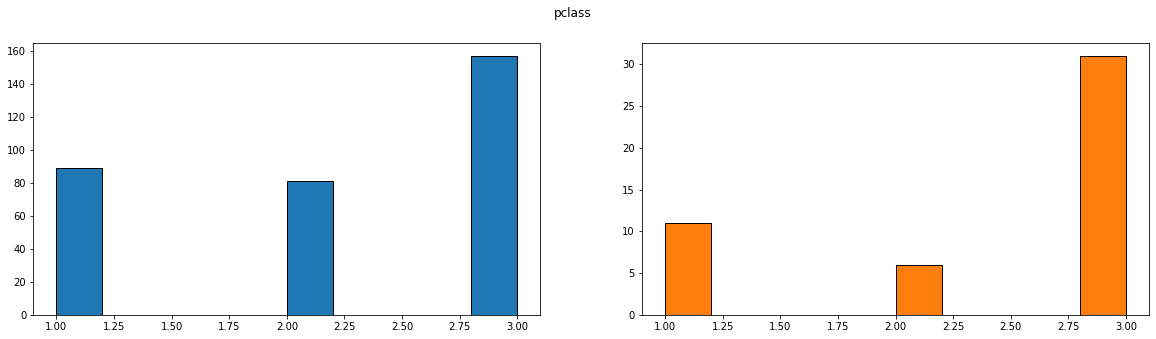

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('pclass')
ax1.hist(test_right['pclass'], edgecolor='black')
#ax2.hist(test_wrong['pclass'], edgecolor='black')
ax2.hist(test_wrong[test_wrong['Survived_cheat'] == 0]['pclass'], edgecolor='black', label='died', histtype='barstacked')
ax2.hist(test_wrong[test_wrong['Survived_cheat'] == 1]['pclass'], edgecolor='black', label='survived', histtype='barstacked')

(array([38.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 53.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

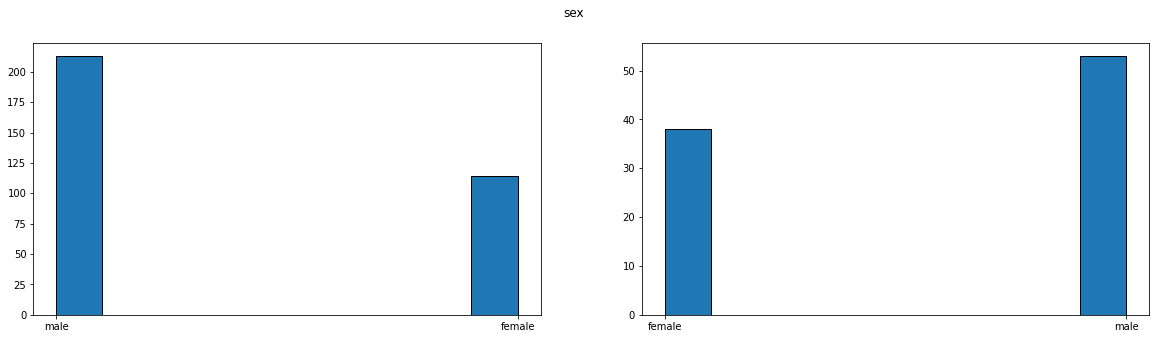

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('sex')
ax1.hist(test_right['sex'], edgecolor='black')
ax2.hist(test_wrong['sex'], edgecolor='black')

(array([ 9.,  1.,  7., 27., 15., 19.,  3.,  6.,  2.,  2.]),
 array([ 0.33 ,  6.597, 12.864, 19.131, 25.398, 31.665, 37.932, 44.199,
        50.466, 56.733, 63.   ]),
 <BarContainer object of 10 artists>)

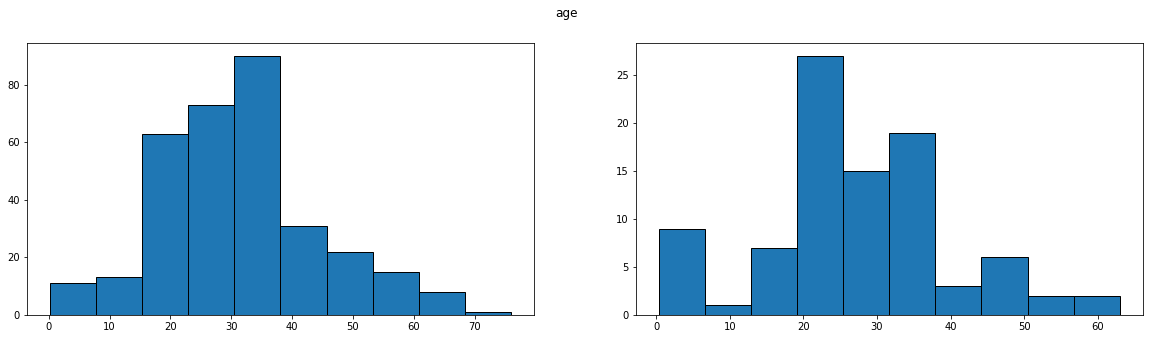

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('age')
ax1.hist(test_right['age'], edgecolor='black')
ax2.hist(test_wrong['age'], edgecolor='black')

(array([61.,  0.,  0., 29.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

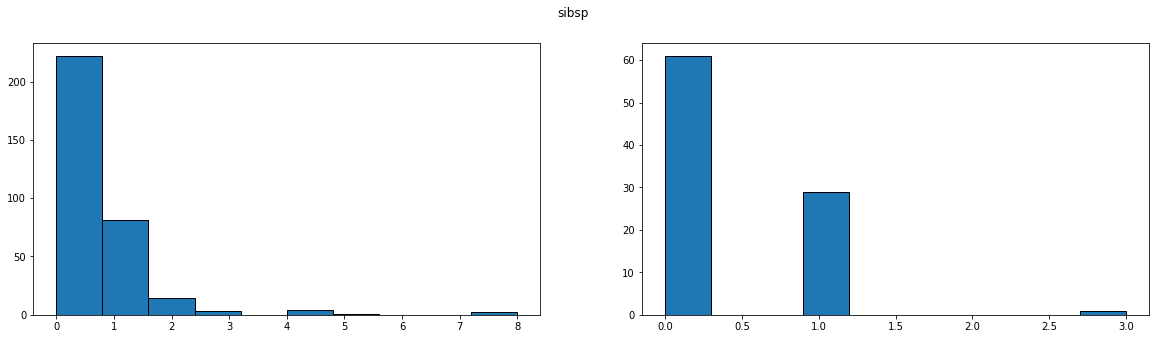

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('sibsp')
ax1.hist(test_right['sibsp'], edgecolor='black')
ax2.hist(test_wrong['sibsp'], edgecolor='black')

(array([72.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  4.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

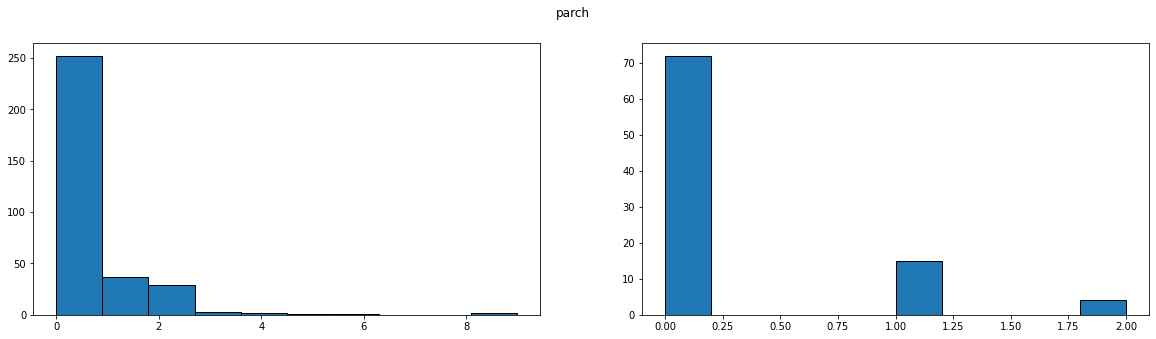

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('parch')
ax1.hist(test_right['parch'], edgecolor='black')
ax2.hist(test_wrong['parch'], edgecolor='black')